# Comparison of Test & Train Set With Selection of Matching and Mismatching Test Prompts

## Preparations

In [26]:
# installations
#!pip install matplotlib numpy pandas

In [5]:
# imports
from datasets import load_dataset
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import Counter
from ast import literal_eval
from scipy.stats import wilcoxon, ttest_1samp, ttest_ind, stats

## Load Datasets with Analysis (Train and Test Set)

In [4]:
analysis_train = pd.read_csv('train.csv', converters = {"lemmata":literal_eval, "pos_tags":literal_eval})
analysis_test = pd.read_csv('test.csv', converters = {"lemmata":literal_eval, "pos_tags":literal_eval})

In [ ]:
analysis_train.head()

,prompt_id,sentence,tokens,lemmata,pos_tags,sent_len,sentiment_pos,sentiment_neg,sentiment_neutr
0,0,SUBREDDIT: r/relationships\nTITLE: I (f/22) ha...,"['relationship', 'f/22', 'figure', 'want', 'kn...","[relationship, f/22, figure, want, know, girl,...","[NOUN, NOUN, NOUN, AUX, VERB, NOUN, VERB, ADJ,...",49,0.902425,0.097561,0.000014
1,0,Backstory:\n,['backstory'],[backstory],[NOUN],3,0.425992,0.281691,0.292318
2,0,When I (f/22) went through my first real break...,"['f/22', 'go', 'real', 'breakup', '2', 'year',...","[f/22, go, real, breakup, 2, year, ago, need, ...","[NOUN, VERB, ADJ, NOUN, NUM, NOUN, ADV, VERB, ...",33,0.734857,0.077453,0.187689
3,0,It was a horrible time in my life due to livin...,"['horrible', 'time', 'life', 'live', 'mother',...","[horrible, time, life, live, mother, finally, ...","[ADJ, NOUN, NOUN, ADJ, NOUN, ADV, VERB, NOUN, ...",27,0.359685,0.616026,0.024289
4,0,I can admit because of it was an emotional wre...,"['admit', 'emotional', 'wreck', 'guy', 'stable...","[admit, emotional, wreck, guy, stable, know, d...","[VERB, ADJ, NOUN, NOUN, ADJ, PROPN, NOUN]",25,0.933862,0.045779,0.020359


In [ ]:
analysis_test.head()

,prompt_id,sentence,tokens,lemmata,pos_tags,sent_len,sentiment_pos,sentiment_neg,sentiment_neutr
0,0,SUBREDDIT: r/relationships\nTITLE: Me,['relationship'],[relationship],[NOUN],9,0.277909,0.462360,0.259731
1,0,"[19 F] with my friend [19 M], not sure if I ma...","['19', 'f', 'friend', '19', 'm', 'sure', 'mess...","[19, f, friend, 19, m, sure, mess, thing]","[NUM, PROPN, NOUN, NUM, NOUN, ADJ, NOUN, NOUN]",24,0.992242,0.003785,0.003973
2,0,POST:,[],[],[],2,0.209116,0.246918,0.543966
3,0,Hello hello everybody.,"['hello', 'hello', 'everybody']","[hello, hello, everybody]","[INTJ, INTJ, PRON]",4,0.478715,0.091491,0.429794
4,0,I hope this isn't too trivial of a question to...,"['hope', 'trivial', 'question', 'ask', 'feel',...","[hope, trivial, question, ask, feel, bit, dept...","[VERB, ADJ, NOUN, INTJ, VERB, NOUN, NOUN, VERB...",55,0.817698,0.116945,0.065357


## Analysis of Sentence Length and Sentiment Score (Train and Test Set)

In [7]:
# Sentence Length and Sentiment Scores | get mean for each prompt (group all sentences in prompt by id)

# Sentence Length
df_sent_len_avg = analysis_train.groupby('prompt_id', as_index=False)['sent_len'].mean()

# Sentiment Scores
df_sentim_pos = analysis_train.groupby('prompt_id', as_index=False)['sentiment_pos'].mean()
df_sentim_neg = analysis_train.groupby('prompt_id', as_index=False)['sentiment_neg'].mean()
df_sentim_neutr = analysis_train.groupby('prompt_id', as_index=False)['sentiment_neutr'].mean()

# df with all of the above features
df_sentence_sentim_train = pd.concat([df_sent_len_avg, df_sentim_pos, df_sentim_neg, df_sentim_neutr], axis = 1)
df_sentence_sentim_train = df_sentence_sentim_train.loc[:,~df_sentence_sentim_train.columns.duplicated()] # removes duplicate column 'prompt_id'
df_sentence_sentim_train

,prompt_id,sent_len,sentiment_pos,sentiment_neg,sentiment_neutr
0,0,18.636364,0.568697,0.242274,0.189029
1,1,17.800000,0.365290,0.227349,0.407360
2,2,19.071429,0.388516,0.262108,0.349376
3,3,20.333333,0.529530,0.178965,0.291505
4,4,17.100000,0.520360,0.254645,0.224995
...,...,...,...,...,...
116717,116717,21.866667,0.674410,0.205873,0.119717
116718,116718,15.700000,0.583203,0.199618,0.217179
116719,116719,18.727273,0.362161,0.147906,0.489934
116720,116720,18.857143,0.525659,0.192807,0.281534


In [8]:
# Sentence Length and Sentiment Scores | get MEAN for each prompt (group all sentences in prompt by id, then average inside these groups)

# Sentence Length
df_sent_len_avg = analysis_test.groupby('prompt_id', as_index=False)['sent_len'].mean()

# Sentiment Scores
df_sentim_pos = analysis_test.groupby('prompt_id', as_index=False)['sentiment_pos'].mean()
df_sentim_neg = analysis_test.groupby('prompt_id', as_index=False)['sentiment_neg'].mean()
df_sentim_neutr = analysis_test.groupby('prompt_id', as_index=False)['sentiment_neutr'].mean()

# als beispiel hier mal in einem data frame, reicht ja aber auch nur die groupby() oben fürs indexen unserer matches
df_sentence_sentim_test = pd.concat([df_sent_len_avg, df_sentim_pos, df_sentim_neg, df_sentim_neutr], axis = 1)
df_sentence_sentim_test = df_sentence_sentim_test.loc[:,~df_sentence_sentim_test.columns.duplicated()] # removes duplicate column 'prompt_id'
df_sentence_sentim_test

,prompt_id,sent_len,sentiment_pos,sentiment_neg,sentiment_neutr
0,0,20.166667,0.501960,0.258953,0.239086
1,1,22.250000,0.438876,0.376221,0.184903
2,2,25.428571,0.511979,0.357651,0.130370
3,3,24.642857,0.521677,0.263471,0.214852
4,4,14.846154,0.435765,0.231189,0.333046
...,...,...,...,...,...
6548,6548,14.038462,0.364716,0.249390,0.385894
6549,6549,19.583333,0.483704,0.251235,0.265061
6550,6550,20.000000,0.488279,0.204835,0.306886
6551,6551,23.900000,0.465454,0.371708,0.162838


## Analysis of POS Tags and Lemmata (Train and Test Set)

### Train Set

In [9]:
# POS over train set

# list of POS  per prompt
grouped_pos_train = analysis_train.groupby('prompt_id', as_index=True, group_keys=True)['pos_tags']
grouped_pos_train = grouped_pos_train.aggregate(np.sum)

# combine in one list
all_pos = [word for sublist in grouped_pos_train.values.tolist() for word in sublist]

# count occurences
pos_counts = Counter(all_pos)

pos_most_common_train = pos_counts.most_common(20)
pos_most_common_train

[('NOUN', 5192107),
 ('VERB', 2633892),
 ('ADJ', 1498375),
 ('ADV', 702404),
 ('PROPN', 700458),
 ('NUM', 359161),
 ('ADP', 146147),
 ('INTJ', 111983),
 ('AUX', 85941),
 ('X', 28690),
 ('PART', 24913),
 ('PRON', 18478),
 ('SCONJ', 17247),
 ('SYM', 14814),
 ('PUNCT', 7906),
 ('CCONJ', 5959),
 ('DET', 1373),
 ('SPACE', 838)]

In [10]:
df_pos_train = pd.DataFrame()

# count how often the 20 most common POS overall appear in each prompt
for tag, count in pos_most_common_train:
    pos_counts_per_prompt = [Counter(pos_list)[tag] for pos_list in grouped_pos_train]
    pos_counts_per_prompt = pd.DataFrame(pos_counts_per_prompt)
    df_pos_train = pd.concat([df_pos_train, pos_counts_per_prompt], ignore_index=True, axis=1)

# df with most commmon POS count per prompt
tags = [tag for tag, count in pos_most_common_train]
df_pos_train = df_pos_train.rename(columns = dict(zip(list(range(20)), tags)))
df_pos_train

,NOUN,VERB,ADJ,ADV,PROPN,NUM,ADP,INTJ,AUX,X,PART,PRON,SCONJ,SYM,PUNCT,CCONJ,DET,SPACE
0,59,32,18,5,5,2,0,0,2,0,0,0,0,0,0,0,0,0
1,36,13,15,5,11,8,1,0,0,0,0,0,0,0,0,0,0,0
2,34,15,13,6,1,4,3,0,0,0,0,0,0,0,0,0,0,0
3,44,12,12,2,0,11,0,0,0,0,0,0,0,9,0,0,0,0
4,39,27,21,11,3,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116717,30,19,8,9,11,0,1,1,1,0,1,0,0,0,0,1,0,0
116718,36,28,15,7,5,1,2,0,1,0,0,0,0,0,0,0,0,0
116719,37,15,12,7,12,0,1,1,0,0,0,0,0,0,1,0,0,0
116720,38,15,14,2,2,1,1,3,1,2,0,0,0,0,0,0,0,0


In [11]:
# Lemmata Over whole Train Set

# list of lemmata per prompt
grouped_lem_train = analysis_train.groupby('prompt_id', as_index=True, group_keys=True)['lemmata']
grouped_lem_train = grouped_lem_train.aggregate(np.sum)

# combine in one list
all_words = [word for sublist in grouped_lem_train.values.tolist() for word in sublist]

# count occurences
lem_counts = Counter(all_words)

lem_most_common_train = lem_counts.most_common(20)
lem_most_common_train

[('like', 153035),
 ('want', 150789),
 ('relationship', 148660),
 ('know', 138289),
 ('feel', 132815),
 ('time', 124852),
 ('friend', 120156),
 ('year', 116369),
 ('go', 110327),
 ('think', 105160),
 ('tell', 98899),
 ('get', 97189),
 ('say', 91495),
 ('thing', 85025),
 ('month', 77595),
 ('talk', 77078),
 ('m', 73680),
 ('work', 71137),
 ('start', 66237),
 ('good', 65098)]

In [12]:
df_lem_train = pd.DataFrame()

# count how often the 20 most common lemmata overall appear in each prompt
for tag, count in lem_most_common_train:
    lem_counts_per_prompt = [Counter(lem_list)[tag] for lem_list in grouped_lem_train]
    lem_counts_per_prompt = pd.DataFrame(lem_counts_per_prompt)
    df_lem_train = pd.concat([df_lem_train, lem_counts_per_prompt], ignore_index=True, axis=1)

# df with most commmon lemmata count per prompt
tags = [tag for tag, count in lem_most_common_train]
df_lem_train = df_lem_train.rename(columns = dict(zip(list(range(20)), tags)))
df_lem_train

,like,want,relationship,know,feel,time,friend,year,go,think,tell,get,say,thing,month,talk,m,work,start,good
0,0,2,1,3,0,3,3,3,3,3,0,2,0,0,1,1,0,0,0,1
1,1,0,0,2,3,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0
2,1,1,3,1,0,0,1,0,2,0,2,0,0,0,1,0,1,1,0,0
3,0,0,0,0,0,1,0,2,0,0,0,0,0,0,4,0,0,0,0,1
4,0,1,1,0,2,2,0,0,1,0,0,0,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116717,0,2,3,5,0,1,5,1,0,0,1,0,0,0,0,0,0,0,0,2
116718,2,4,4,5,4,0,1,1,1,3,0,1,0,0,0,0,1,0,2,1
116719,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1
116720,2,1,2,0,1,1,0,1,1,2,0,1,0,2,1,0,1,0,2,1


### Test Set

In [13]:
# POS Over Test Prompts

# list of POS  per prompt
grouped_pos_test = analysis_test.groupby('prompt_id', as_index=True, group_keys=True)['pos_tags']
grouped_pos_test = grouped_pos_test.aggregate(np.sum)

df_pos_test = pd.DataFrame()

# count how often the 20 most common POS in train set appear in each test prompt
for tag, count in pos_most_common_train:
    pos_counts_per_prompt = [Counter(pos_list)[tag] for pos_list in grouped_pos_test]
    pos_counts_per_prompt = pd.DataFrame(pos_counts_per_prompt)
    df_pos_test = pd.concat([df_pos_test, pos_counts_per_prompt], ignore_index=True, axis=1)

# rename df with most commmon POS count per prompt
tags = [tag for tag, count in pos_most_common_train]
df_pos_test = df_pos_test.rename(columns = dict(zip(list(range(20)), tags)))
df_pos_test

,NOUN,VERB,ADJ,ADV,PROPN,NUM,ADP,INTJ,AUX,X,PART,PRON,SCONJ,SYM,PUNCT,CCONJ,DET,SPACE
0,56,33,11,14,9,2,1,7,3,2,0,1,0,0,0,0,0,0
1,32,17,7,8,8,1,1,1,0,1,0,0,0,0,0,0,0,0
2,25,8,7,3,7,6,0,0,1,0,0,0,0,0,1,0,0,0
3,48,23,18,14,8,0,1,0,0,0,0,0,0,0,0,0,0,0
4,31,11,6,6,9,3,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6548,55,20,13,6,1,4,2,0,2,0,0,0,0,0,0,0,0,0
6549,37,22,10,5,3,5,0,2,1,1,0,0,1,0,0,0,0,0
6550,21,17,5,2,0,2,1,0,0,0,0,0,0,0,0,0,0,0
6551,62,36,16,13,5,9,1,1,0,1,0,0,0,0,0,0,0,0


In [14]:
# Lemmata Over Test Prompts

# list of lemmata per prompt
grouped_lem_test = analysis_test.groupby('prompt_id', as_index=True, group_keys=True)['lemmata']
grouped_lem_test = grouped_lem_test.aggregate(np.sum)

df_lem_test = pd.DataFrame()

# count how often the 20 most common lemmata in train set appear in each prompt
for tag, count in lem_most_common_train:
    lem_counts_per_prompt = [Counter(lem_list)[tag] for lem_list in grouped_lem_test]
    lem_counts_per_prompt = pd.DataFrame(lem_counts_per_prompt)
    df_lem_test = pd.concat([df_lem_test, lem_counts_per_prompt], ignore_index=True, axis=1)

# df with most commmon lemmata count per prompt
tags = [tag for tag, count in lem_most_common_train]
df_lem_test = df_lem_test.rename(columns = dict(zip(list(range(20)), tags)))
df_lem_test

,like,want,relationship,know,feel,time,friend,year,go,think,tell,get,say,thing,month,talk,m,work,start,good
0,1,3,3,1,1,2,2,0,3,1,0,1,1,3,0,3,1,1,1,0
1,1,4,1,0,0,2,3,1,0,0,0,0,1,1,0,1,0,0,0,0
2,0,0,2,1,0,2,3,0,0,0,0,1,0,0,1,0,2,0,0,0
3,1,0,0,0,0,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0
4,0,2,1,0,0,0,0,1,0,1,0,0,0,0,2,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6548,2,2,3,0,2,2,0,5,1,0,0,0,0,0,0,0,1,1,2,2
6549,1,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,2,0
6550,0,0,2,1,2,1,0,0,0,3,0,1,0,0,1,0,1,0,0,0
6551,1,0,2,0,6,1,0,3,3,0,3,2,1,0,0,0,1,0,1,1


## Plots for Analyzing Train and Test Set

In [15]:
# t-test showing no sign. difference between train and test set's sentence length
a = analysis_train.groupby('prompt_id', as_index=False)['sent_len'].mean()['sent_len']
b = analysis_test.groupby('prompt_id', as_index=False)['sent_len'].mean()['sent_len']
stats.ttest_ind(a,b)

Ttest_indResult(statistic=-1.4201614622371876, pvalue=0.15556320922054467)

Average Sentence length in Train Set: 20.15903787244931
Average Sentence length in Test Set: 20.254788995691754


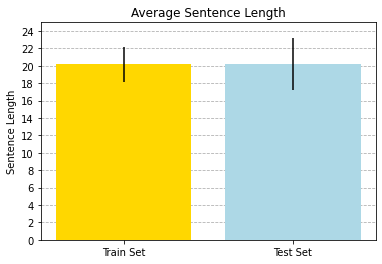

In [16]:
# Sentence length
df_sent_len_avg_train = analysis_train.groupby('prompt_id', as_index=False)['sent_len'].mean()['sent_len'].mean()
df_sent_len_avg_test = analysis_test.groupby('prompt_id', as_index=False)['sent_len'].mean()['sent_len'].mean()
se = [df_sentence_sentim_train['sent_len'].std(), df_sentence_sentim_test['sent_len'].std()]
x = ['Train Set', 'Test Set']
y = [df_sent_len_avg_train, df_sent_len_avg_test]

plt.grid(axis = "y", linestyle = "--", zorder = 0)
plt.bar(x, y, zorder = 2.5, yerr = [2,3], color = ["gold", "lightblue"])
plt.ylim(0, 25)
plt.title("Average Sentence Length")
plt.ylabel("Sentence Length")
plt.yticks(ticks=np.arange(0, 25, 2))

print("Average Sentence length in Train Set:", df_sent_len_avg_train)
print("Average Sentence length in Test Set:", df_sent_len_avg_test)

[48.671476706431996, 48.53739202777847] [26.237809074850233, 26.30756477131977] [25.090714210538227, 25.15504321363153]


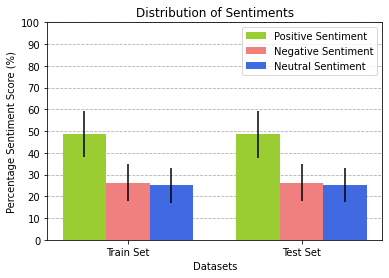

In [19]:
# Sentiment

# se
se_pos_train = df_sentence_sentim_train['sentiment_pos'].std()*100
se_neg_train = df_sentence_sentim_train['sentiment_neg'].std()*100
se_neutr_train = df_sentence_sentim_train['sentiment_neutr'].std()*100
se_pos_test = df_sentence_sentim_test['sentiment_pos'].std()*100
se_neg_test = df_sentence_sentim_test['sentiment_neg'].std()*100
se_neutr_test = df_sentence_sentim_test['sentiment_neutr'].std()*100

# pos, neg and neutr groups
labels = ['Train Set', 'Test Set']
values_group1 = [df_sentence_sentim_test.mean()['sentiment_pos']*100, df_sentence_sentim_train.mean()['sentiment_pos']*100]
values_group2 = [df_sentence_sentim_test.mean()['sentiment_neg']*100, df_sentence_sentim_train.mean()['sentiment_neg']*100]
values_group3 = [df_sentence_sentim_test.mean()['sentiment_neutr']*100, df_sentence_sentim_train.mean()['sentiment_neutr']*100]
bar_width = 0.25  # Breite der Balken
print(values_group1,values_group2,values_group3)
# position
x = np.arange(len(labels))
x_group1 = x - bar_width
x_group2 = x
x_group3 = x + bar_width

plt.grid(axis = "y", linestyle = "--", zorder = 0)

# bars
plt.bar(x_group1, values_group1, width=bar_width, label='Positive Sentiment', zorder = 2.5, yerr = [se_pos_train, se_pos_test], color = 'yellowgreen')
plt.bar(x_group2, values_group2, width=bar_width, label='Negative Sentiment', zorder = 2.5, yerr = [se_neg_train, se_neg_test], color = 'lightcoral')
plt.bar(x_group3, values_group3, width=bar_width, label='Neutral Sentiment', zorder = 2.5, yerr = [se_neutr_train, se_neutr_test], color = 'royalblue')

# labels
plt.xlabel('Datasets')
plt.ylabel('Percentage Sentiment Score (%)')
plt.ylim(0, 100)
plt.yticks(ticks=np.arange(0, 110, 10))
plt.title('Distribution of Sentiments')
plt.legend()
plt.xticks(x, labels)

plt.show()

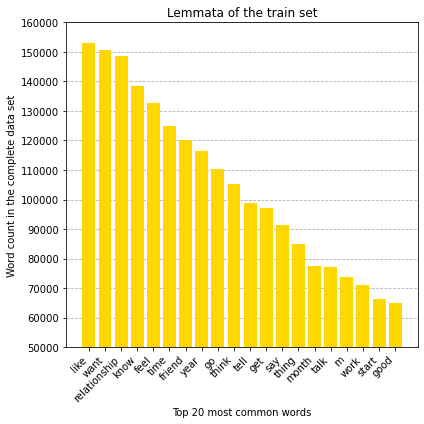

In [20]:
# Lemmata Train

#lem_most_common_train = lem_most_common

words = [item[0] for item in lem_most_common_train]
values = [item[1] for item in lem_most_common_train]

# Erstelle das Balkendiagramm
plt.figure(figsize=(6, 6))
plt.grid(axis = "y", linestyle = "--", zorder = 0)
plt.bar(words, values, color='gold', zorder=2.5)
plt.xlabel('Words')
plt.ylabel('Values')
plt.title('Bar Chart of Words and Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# labels
plt.xlabel('Top 20 most common words')
plt.ylabel('Word count in the complete data set')
plt.ylim(50000, 160000)
plt.yticks(ticks=np.arange(50000, 170000, 10000))
plt.title('Lemmata of the train set')

plt.show()

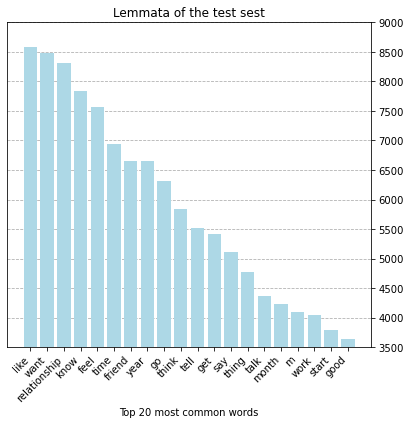

In [21]:
# Lemmata Test

grouped_lem_test = analysis_test.groupby('prompt_id', as_index=True, group_keys=True)['lemmata']
grouped_lem_test = grouped_lem_test.aggregate(np.sum)
all_words = [word for sublist in grouped_lem_test.values.tolist() for word in sublist]
lem_counts = Counter(all_words)

lem_most_common_test = lem_counts.most_common(20)
lem_most_common_test

words = [item[0] for item in lem_most_common_test]
values = [item[1] for item in lem_most_common_test]

# Erstelle das Balkendiagramm
plt.figure(figsize=(6, 6))
plt.grid(axis = "y", linestyle = "--", zorder = 0)
plt.bar(words, values, color='lightblue', zorder=2.5)
plt.xlabel('Words')
plt.ylabel('Values')
plt.title('Bar Chart of Words and Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# labels
plt.xlabel('Top 20 most common words')
plt.ylabel('')
plt.ylim(3500, 9000)
plt.yticks(ticks=np.arange(3500, 9500, 500))
plt.title('Lemmata of the test sest')
plt.gca().yaxis.set_ticks_position('right')

plt.show()

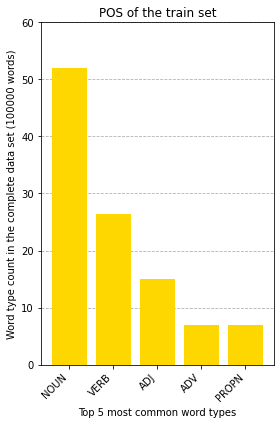

In [23]:
# POS Train

pos_most_common_train = Counter([word for sublist in grouped_pos_train.values.tolist() for word in sublist]).most_common(5)

words = [item[0] for item in pos_most_common_train]
values = [item[1]/100000 for item in pos_most_common_train]

# Erstelle das Balkendiagramm
plt.figure(figsize=(4, 6))
plt.grid(axis = "y", linestyle = "--", zorder = 0)
plt.bar(words, values, color='gold', zorder=2.5)
plt.xlabel('Words')
plt.ylabel('Values')
plt.title('Bar Chart of Words and Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# labels
plt.xlabel('Top 5 most common word types')
plt.ylabel('Word type count in the complete data set (100000 words)')
plt.ylim(0, 60)
plt.yticks(ticks=np.arange(0, 70, 10))
plt.title('POS of the train set')

plt.show()

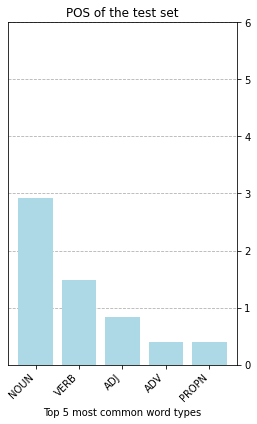

[2.92586, 1.48621, 0.84255, 0.39678, 0.39074]


In [24]:
# POS Test

grouped_pos_test = analysis_test.groupby('prompt_id', as_index=True, group_keys=True)['pos_tags']
grouped_pos_test = grouped_pos_test.aggregate(np.sum)
all_words = [word for sublist in grouped_pos_test.values.tolist() for word in sublist]
pos_counts = Counter(all_words)

pos_most_common_test = pos_counts.most_common(5)
pos_most_common_test

words = [item[0] for item in pos_most_common_test]
values = [item[1]/100000 for item in pos_most_common_test]

# Erstelle das Balkendiagramm
plt.figure(figsize=(4, 6))
plt.grid(axis = "y", linestyle = "--", zorder = 0)
plt.bar(words, values, color='lightblue', zorder=2.5)
plt.xlabel('Words')
plt.ylabel('Values')
plt.title('Bar Chart of Words and Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# labels
plt.xlabel('Top 5 most common word types')
plt.ylabel('')
plt.ylim(0, 6)
plt.yticks(ticks=np.arange(0, 7, 1))
plt.title('POS of the test set')
plt.gca().yaxis.set_ticks_position('right')

plt.show()
print(values)

## Select Matching and Mismatching Test Prompts

### Sentence Length

In [14]:
# defining criteria from main training set statistics

# we choose test prompts with statistics that fall into/out of the 95% confidence interval of the train statistics: [mean +/- 1.96 * std]
x = 1.96

In [15]:
# Sentence Length
crit_sent_len_upper = df_sentence_sentim_train['sent_len'].mean() + x * df_sentence_sentim_train['sent_len'].std()
crit_sent_len_lower = df_sentence_sentim_train['sent_len'].mean() - x * df_sentence_sentim_train['sent_len'].std()

In [16]:
# select IDs for Sentence Length matches and mismatches
matches_sent_len = df_sentence_sentim_test.loc[(df_sentence_sentim_test['sent_len'] >= crit_sent_len_lower) & (df_sentence_sentim_test['sent_len'] <= crit_sent_len_upper)]
mismatches_sent_len = df_sentence_sentim_test.loc[(df_sentence_sentim_test['sent_len'] < crit_sent_len_lower) | (df_sentence_sentim_test['sent_len'] > crit_sent_len_upper)]

match_id_sentlen = np.random.choice(matches_sent_len['prompt_id'], 13)
mismatch_id_sentlen = np.random.choice(mismatches_sent_len['prompt_id'], 13)

### Sentiment Score

In [17]:
# Sentiment Score
crit_sentim_pos_upper = df_sentence_sentim_train['sentiment_pos'].mean() + x * df_sentence_sentim_train['sentiment_pos'].std()
crit_sentim_pos_lower = df_sentence_sentim_train['sentiment_pos'].mean() - x * df_sentence_sentim_train['sentiment_pos'].std()

# Sentiment Score
crit_sentim_neg_upper = df_sentence_sentim_train['sentiment_neg'].mean() + x * df_sentence_sentim_train['sentiment_neg'].std()
crit_sentim_neg_lower = df_sentence_sentim_train['sentiment_neg'].mean() - x * df_sentence_sentim_train['sentiment_neg'].std()

# Sentiment Score
crit_sentim_neutr_upper = df_sentence_sentim_train['sentiment_neutr'].mean() + x * df_sentence_sentim_train['sentiment_neutr'].std()
crit_sentim_neutr_lower = df_sentence_sentim_train['sentiment_neutr'].mean() - x * df_sentence_sentim_train['sentiment_neutr'].std()

In [18]:
# select IDs for Sentiment matches and mismatches
matches_sentim = df_sentence_sentim_test.loc[(df_sentence_sentim_test['sentiment_pos'] >= crit_sentim_pos_lower) & (df_sentence_sentim_test['sentiment_pos'] <= crit_sentim_pos_upper) &
                                     (df_sentence_sentim_test['sentiment_neg'] >= crit_sentim_neg_lower) & (df_sentence_sentim_test['sentiment_neg'] <= crit_sentim_neg_upper) &
                                     (df_sentence_sentim_test['sentiment_neutr'] >= crit_sentim_neutr_lower) & (df_sentence_sentim_test['sentiment_neutr'] <= crit_sentim_neutr_upper)]
mismatches_sentim = df_sentence_sentim_test.loc[(df_sentence_sentim_test['sentiment_pos'] < crit_sentim_pos_lower) | (df_sentence_sentim_test['sentiment_pos'] > crit_sentim_pos_upper) &
                                     (df_sentence_sentim_test['sentiment_neg'] < crit_sentim_neg_lower) | (df_sentence_sentim_test['sentiment_neg'] > crit_sentim_neg_upper) &
                                     (df_sentence_sentim_test['sentiment_neutr'] < crit_sentim_neutr_lower) | (df_sentence_sentim_test['sentiment_neutr'] > crit_sentim_neutr_upper)]


match_id_sentim = np.random.choice(matches_sentim['prompt_id'], 13)
mismatch_id_sentim = np.random.choice(mismatches_sentim['prompt_id'], 13)

### Lemmata

In [19]:
# Lemmata: check significant difference between test prompt lemmata and most common train lemmata

mismatch_lem = []
match_lem = []

for i in range(len(df_lem_test)):
    d = df_lem_test.loc[i].values - df_lem_train.mean()
    stat, p = wilcoxon(d)
    if p < 0.05:
        mismatch_lem.append(i)
    else:
        match_lem.append(i)

In [20]:
# select IDs for Lemmata matches and mismatches
match_id_lem = np.random.choice(match_lem, 13)
mismatch_id_lem = np.random.choice(mismatch_lem, 13)

### POS Tags

In [21]:
# POS Tags: check significant difference between test prompt POS and most common train POS

mismatch_pos = []
match_pos = []

for i in range(len(df_pos_test)):
    d = df_pos_test.loc[i].values - df_pos_train.mean()
    stat, p = wilcoxon(d)
    if p < 0.05:
        mismatch_pos.append(i)
    else:
        match_pos.append(i)

In [22]:
# select IDs for POS matches and mismatches
match_id_pos = np.random.choice(match_pos, 13)
mismatch_id_pos = np.random.choice(mismatch_pos, 13)

### Create list of matching and mismatching IDs

In [23]:
# helper function to flatten list of matches
def flatten_extend(matrix):
    flat_list = []
    for row in matrix:
        flat_list.extend(row)
    return flat_list

In [24]:
# prepare list of matching and mismatching ids
match_ids = [match_id_sentlen, match_id_sentim, match_id_lem, match_id_pos]
mismatch_ids = [mismatch_id_sentlen, mismatch_id_sentim, mismatch_id_lem, mismatch_id_pos]

match_ids = flatten_extend(match_ids)
mismatch_ids = flatten_extend(mismatch_ids)

match_ids = np.unique(match_ids)
mismatch_ids = np.unique(mismatch_ids)

### Load dataset by CarperAI

In [ ]:
# load the dataset
dataset = load_dataset("CarperAI/openai_summarize_tldr")
dataset

In [ ]:
# split test and train in dataframes with prompt and label column
train = pd.DataFrame(dataset['train'])
test = pd.DataFrame(dataset['test'])

prompts_train = train['prompt']
prompts_test = test['prompt']

### Select and save test prompts via id

In [125]:
# find test prompts with matching ids and save them
match_prompts = prompts_test[match_ids]
match_prompts.to_csv("match_prompts.csv")

In [126]:
# find test prompts with mismatching ids and save them
mismatch_prompts = prompts_test[mismatch_ids]
mismatch_prompts.to_csv("mismatch_prompts.csv")